# **Import Dependencies**

In [1]:
!pip install tensorflow --upgrade

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 620.7/620.7 MB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 3.2 MB/s eta 0:00:00
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.19.0
    Uninstalling tensorboard-2.19.0:
      Successfully uninstalled tensorboard-2.19.0
  Attempting uninstall: tensorflow
    Found existing installation: tensorflow 2.19.0
    Uninstalling tensorflow-2.19.0:
      Successfully uninstalled tensorflow-2.19.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
dopamine-rl 4.1.2 requires gymnasium>=1.0.0, but you have gymnasium 0.29.0 which is incompatible.
tensorflow-text 2.19.0 requires tensorflow<2.20,>=2.19.0, but you have tensorflow 2.20.0 which is incompatible.
tensorflow-decision-forests 1.12.0 requires tensorflow==2.19.0, but you have tensorflow 2.20.0 which is incompati

# **Import Modules**

In [2]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Dense, Flatten, Dropout, Lambda
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator

from sklearn.model_selection import train_test_split

In [3]:
print("TensorFlow Version:", tf.__version__)

TensorFlow Version: 2.20.0


# **Load The Data**

In [4]:
# ==========================================================
# DATASET PATH
# ==========================================================
DATASET_PATH = "/kaggle/input/training-car/data"
CSV_PATH = os.path.join(DATASET_PATH, "driving_log.csv")
IMG_DIR = os.path.join(DATASET_PATH, "IMG")

print("CSV_PATH:", CSV_PATH)
print("IMG_DIR:", IMG_DIR)

CSV_PATH: /kaggle/input/training-car/data/driving_log.csv
IMG_DIR: /kaggle/input/training-car/data/IMG


In [5]:
# ==========================================================
# LOAD CSV
# ==========================================================
df = pd.read_csv(CSV_PATH)
df.columns = ["center", "left", "right", "steering", "throttle", "brake", "speed"]

In [6]:
df.head()

,center,left,right,steering,throttle,brake,speed
0,IMG/center_2016_12_01_13_30_48_287.jpg,IMG/left_2016_12_01_13_30_48_287.jpg,IMG/right_2016_12_01_13_30_48_287.jpg,0.0,0.0,0.0,22.148290
1,IMG/center_2016_12_01_13_30_48_404.jpg,IMG/left_2016_12_01_13_30_48_404.jpg,IMG/right_2016_12_01_13_30_48_404.jpg,0.0,0.0,0.0,21.879630
2,IMG/center_2016_12_01_13_31_12_937.jpg,IMG/left_2016_12_01_13_31_12_937.jpg,IMG/right_2016_12_01_13_31_12_937.jpg,0.0,0.0,0.0,1.453011
3,IMG/center_2016_12_01_13_31_13_037.jpg,IMG/left_2016_12_01_13_31_13_037.jpg,IMG/right_2016_12_01_13_31_13_037.jpg,0.0,0.0,0.0,1.438419
4,IMG/center_2016_12_01_13_31_13_177.jpg,IMG/left_2016_12_01_13_31_13_177.jpg,IMG/right_2016_12_01_13_31_13_177.jpg,0.0,0.0,0.0,1.418236


# **Data Preprocessing**

In [7]:
df["center"].apply(lambda x: x.strip())

0       IMG/center_2016_12_01_13_30_48_287.jpg
1       IMG/center_2016_12_01_13_30_48_404.jpg
2       IMG/center_2016_12_01_13_31_12_937.jpg
3       IMG/center_2016_12_01_13_31_13_037.jpg
4       IMG/center_2016_12_01_13_31_13_177.jpg
                         ...                  
8031    IMG/center_2016_12_01_13_46_38_745.jpg
8032    IMG/center_2016_12_01_13_46_38_802.jpg
8033    IMG/center_2016_12_01_13_46_38_846.jpg
8034    IMG/center_2016_12_01_13_46_38_922.jpg
8035    IMG/center_2016_12_01_13_46_38_947.jpg
Name: center, Length: 8036, dtype: object

In [8]:
df["center"].apply(lambda x: os.path.basename(x))

0       center_2016_12_01_13_30_48_287.jpg
1       center_2016_12_01_13_30_48_404.jpg
2       center_2016_12_01_13_31_12_937.jpg
3       center_2016_12_01_13_31_13_037.jpg
4       center_2016_12_01_13_31_13_177.jpg
                       ...                
8031    center_2016_12_01_13_46_38_745.jpg
8032    center_2016_12_01_13_46_38_802.jpg
8033    center_2016_12_01_13_46_38_846.jpg
8034    center_2016_12_01_13_46_38_922.jpg
8035    center_2016_12_01_13_46_38_947.jpg
Name: center, Length: 8036, dtype: object

In [9]:
# Clean paths
df["center"] = df["center"].apply(lambda x: x.strip())
df["center"] = df["center"].apply(lambda x: os.path.basename(x))

In [10]:
df["center"].apply(lambda x: os.path.join(IMG_DIR, x))

0       /kaggle/input/training-car/data/IMG/center_201...
1       /kaggle/input/training-car/data/IMG/center_201...
2       /kaggle/input/training-car/data/IMG/center_201...
3       /kaggle/input/training-car/data/IMG/center_201...
4       /kaggle/input/training-car/data/IMG/center_201...
                              ...                        
8031    /kaggle/input/training-car/data/IMG/center_201...
8032    /kaggle/input/training-car/data/IMG/center_201...
8033    /kaggle/input/training-car/data/IMG/center_201...
8034    /kaggle/input/training-car/data/IMG/center_201...
8035    /kaggle/input/training-car/data/IMG/center_201...
Name: center, Length: 8036, dtype: object

In [11]:
# Create full image path
df["image_path"] = df["center"].apply(lambda x: os.path.join(IMG_DIR, x))

In [12]:
# Remove missing images
df = df[df["image_path"].apply(os.path.exists)]

print("Total valid samples:", len(df))

Total valid samples: 8036


In [13]:
# ==========================================================
# TRAIN TEST SPLIT
# ==========================================================
train_df, val_df = train_test_split(df, test_size=0.2, random_state=42)

print("Train samples:", len(train_df))
print("Val samples:", len(val_df))

Train samples: 6428
Val samples: 1608


In [14]:
# ==========================================================
# IMAGE SETTINGS
# ==========================================================
IMG_W = 200
IMG_H = 66
BATCH_SIZE = 32

# ==========================================================
# IMAGE DATA GENERATOR
# ==========================================================
train_datagen = ImageDataGenerator(
    rescale=1./255,
    brightness_range=[0.5, 1.2],
    zoom_range=0.2,
    horizontal_flip=True
)

val_datagen = ImageDataGenerator(rescale=1./255)

In [15]:
# ==========================================================
# GENERATORS (REGRESSION MODE)
# ==========================================================
train_generator = train_datagen.flow_from_dataframe(
    dataframe=train_df,
    x_col="image_path",
    y_col="steering",
    target_size=(IMG_H, IMG_W),
    batch_size=BATCH_SIZE,
    class_mode="raw",          # IMPORTANT for regression
    shuffle=True
)

val_generator = val_datagen.flow_from_dataframe(
    dataframe=val_df,
    x_col="image_path",
    y_col="steering",
    target_size=(IMG_H, IMG_W),
    batch_size=BATCH_SIZE,
    class_mode="raw",
    shuffle=False
)

Found 6428 validated image filenames.
Found 1608 validated image filenames.


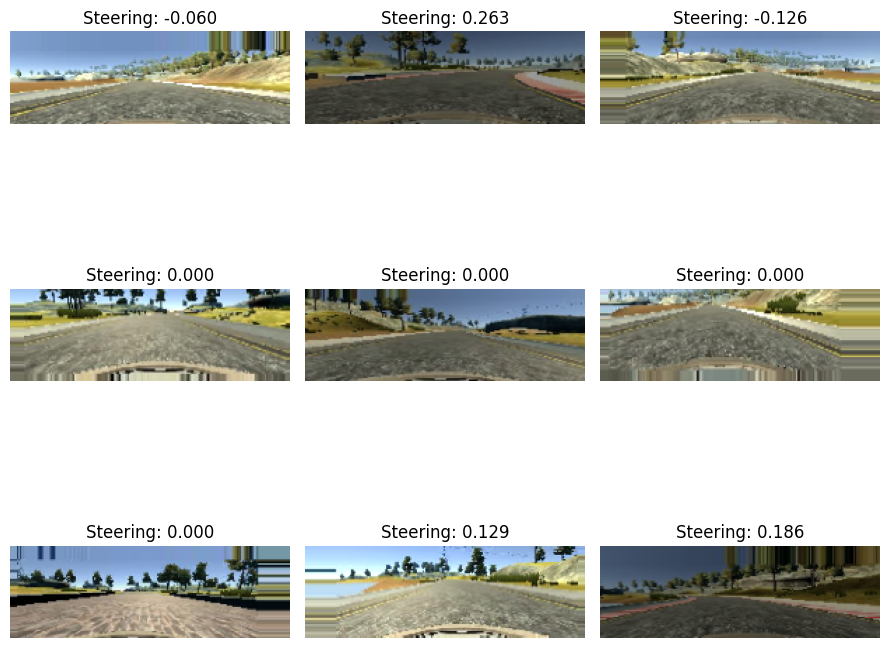

In [16]:
# Visualize Random Sample Images

plt.figure(figsize=(9, 9))

for images, labels in train_generator:
    for i in range(9):
        plt.subplot(3, 3, i + 1)
        plt.imshow(images[i])
        plt.title(f"Steering: {labels[i]:.3f}")
        plt.axis("off")
    break

plt.tight_layout()
plt.show()


# **Model Building**

In [17]:
# ==========================================================
# NVIDIA MODEL ARCHITECTURE
# ==========================================================
def nvidia_model():
    model = Sequential()

    model.add(Lambda(lambda x: x, input_shape=(IMG_H, IMG_W, 3)))

    model.add(Conv2D(24, (5, 5), strides=(2, 2), activation="relu"))
    model.add(Conv2D(36, (5, 5), strides=(2, 2), activation="relu"))
    model.add(Conv2D(48, (5, 5), strides=(2, 2), activation="relu"))
    model.add(Conv2D(64, (3, 3), activation="relu"))
    model.add(Conv2D(64, (3, 3), activation="relu"))

    model.add(Flatten())

    model.add(Dense(100, activation="relu"))
    model.add(Dropout(0.3))

    model.add(Dense(50, activation="relu"))
    model.add(Dropout(0.3))

    model.add(Dense(10, activation="relu"))

    model.add(Dense(1))   # output steering value

    model.compile(
        optimizer=Adam(learning_rate=1e-4),
        loss="mse",
        metrics=["mae"]
    )

    return model


model = nvidia_model()
model.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/lambda_layer.py:65: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
I0000 00:00:1771335666.996897      24 gpu_device.cc:2020] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 13757 MB memory:  -> device: 0, name: Tesla T4, pci bus id: 0000:00:04.0, compute capability: 7.5
I0000 00:00:1771335666.999918      24 gpu_device.cc:2020] Created device /job:localhost/replica:0/task:0/device:GPU:1 with 13757 MB memory:  -> device: 1, name: Tesla T4, pci bus id: 0000:00:05.0, compute capability: 7.5


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lambda (Lambda)                 │ (None, 66, 200, 3)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 31, 98, 24)     │         1,824 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 14, 47, 36)     │        21,636 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 5, 22, 48)      │        43,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 3, 20, 64)      │        27,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 1, 18, 64)      │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1152)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 100)            │       115,300 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 100)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 50)             │         5,050 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 50)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │           510 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            11 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 252,219 (985.23 KB)

 Trainable params: 252,219 (985.23 KB)

 Non-trainable params: 0 (0.00 B)

In [18]:
# ==========================================================
# TRAIN MODEL
# ==========================================================
EPOCHS = 10

history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=EPOCHS
)

/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
  1/201 ━━━━━━━━━━━━━━━━━━━━ 25:02 8s/step - loss: 0.0252 - mae: 0.1077

I0000 00:00:1771335676.080818      77 device_compiler.h:196] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


201/201 ━━━━━━━━━━━━━━━━━━━━ 68s 305ms/step - loss: 0.0177 - mae: 0.0797 - val_loss: 0.0158 - val_mae: 0.0696
Epoch 2/10
201/201 ━━━━━━━━━━━━━━━━━━━━ 34s 167ms/step - loss: 0.0170 - mae: 0.0737 - val_loss: 0.0157 - val_mae: 0.0675
Epoch 3/10
201/201 ━━━━━━━━━━━━━━━━━━━━ 34s 168ms/step - loss: 0.0180 - mae: 0.0748 - val_loss: 0.0158 - val_mae: 0.0691
Epoch 4/10
201/201 ━━━━━━━━━━━━━━━━━━━━ 34s 169ms/step - loss: 0.0162 - mae: 0.0698 - val_loss: 0.0157 - val_mae: 0.0679
Epoch 5/10
201/201 ━━━━━━━━━━━━━━━━━━━━ 33s 162ms/step - loss: 0.0169 - mae: 0.0721 - val_loss: 0.0157 - val_mae: 0.0670
Epoch 6/10
201/201 ━━━━━━━━━━━━━━━━━━━━ 32s 160ms/step - loss: 0.0170 - mae: 0.0715 - val_loss: 0.0157 - val_mae: 0.0666
Epoch 7/10
201/201 ━━━━━━━━━━━━━━━━━━━━ 32s 161ms/step - loss: 0.0164 - mae: 0.0709 - val_loss: 0.0158 - val_mae: 0.0688
Epoch 8/10
201/201 ━━━━━━━━━━━━━━━━━━━━ 32s 161ms/step - loss: 0.0158 - mae: 0.0707 - val_loss: 0.0157 - val_mae: 0.0669
Epoch 9/10
201/201 ━━━━━━━━━━━━━━━━━━━━ 32s

# **Model Evaluation**

In [19]:
# ==========================================================
# SAVE MODEL
# ==========================================================
SAVE_PATH = "/kaggle/working/steering_model.h5"
model.save(SAVE_PATH)

print("Saved model:", SAVE_PATH)

Saved model: /kaggle/working/steering_model.h5


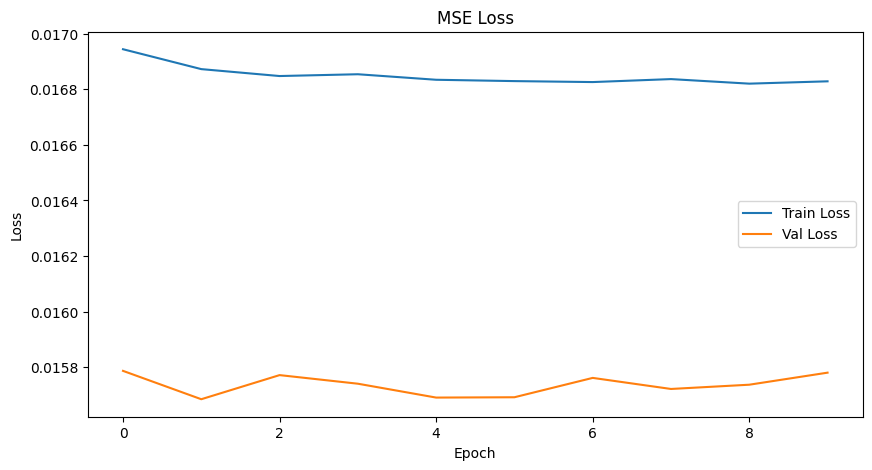

In [20]:
# ==========================================================
# PLOT LOSS
# ==========================================================
plt.figure(figsize=(10, 5))
plt.plot(history.history["loss"], label="Train Loss")
plt.plot(history.history["val_loss"], label="Val Loss")
plt.title("MSE Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 449ms/step
True: -0.09773462
Pred: 0.009720753


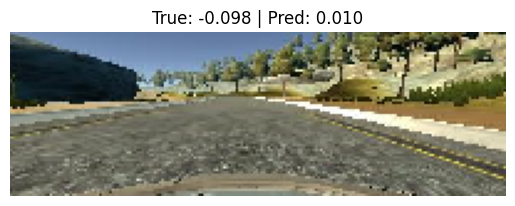

In [21]:
# ==========================================================
# TEST ONE IMAGE (For Loop Method)
# ==========================================================
for images, labels in val_generator:
    pred = model.predict(images)

    print("True:", labels[0])
    print("Pred:", pred[0][0])

    plt.imshow(images[0])
    plt.title(f"True: {labels[0]:.3f} | Pred: {pred[0][0]:.3f}")
    plt.axis("off")
    plt.show()

    break


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step


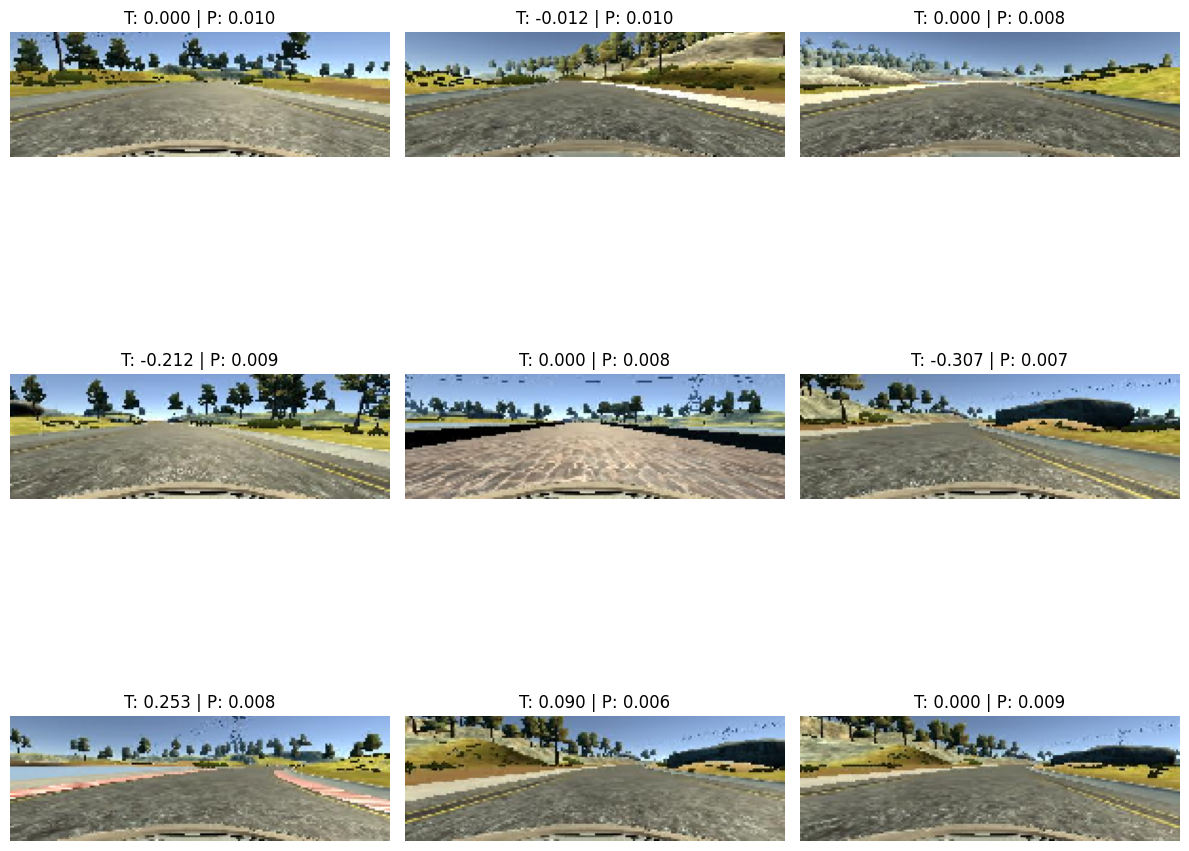

In [22]:
# ==========================================================
# TEST MULTIPLE IMAGES (For Loop Prediction)
# ==========================================================
plt.figure(figsize=(12, 12))

for images, labels in val_generator:
    preds = model.predict(images)

    for i in range(9):
        plt.subplot(3, 3, i + 1)
        plt.imshow(images[i])

        true_angle = labels[i]
        pred_angle = preds[i][0]

        plt.title(f"T: {true_angle:.3f} | P: {pred_angle:.3f}")
        plt.axis("off")

    break

plt.tight_layout()
plt.show()
